## Задача 2.4. Спектр пачки равноотстоящих импульсов

|    Варианты:    |  1  |  2  |  3  |  4  |  5  |  6  |  7  |  8  |  9  |  10 |  11 |  12 |
|:---------------:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|        N        |  3  |  4  |  3  |  4  |  3  |  4  |  3  |  4  |  3  |  4  |  3  |  4  |
| $\tau$**, мкс**     | 300 | 50  | 100 | 125 | 250 | 60  | 200 | 400 | 500 | 150 | 450 | 100 |
| $T_{period}$**, мкс** | 600 | 125 | 200 | 275 | 500 | 100 | 400 | 700 | 800 | 300 | 810 | 200 |

Ниже приведен пример вычисления спектр пачки из $N=4$ равноотстоящих импульсов длительностью $\tau = 100$ мкс с периодом повторения $T_{period}=400$ мкс.

Повторить вычисления для заданных значений $N$, $\tau$, $T_{period}$. Сравнить получившийся график с аналитическим выражением для спектра.


In [1]:
import numpy as np # импорт бибилиотеки numpy
import matplotlib.pyplot as plt # импорт модуля matplotlib.pyplot
import scipy.integrate as integrate # импорт модуля численного интегрирования

from my_lib import *

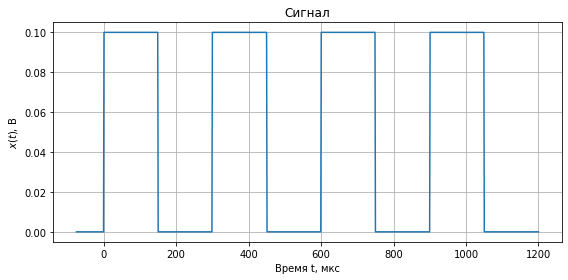

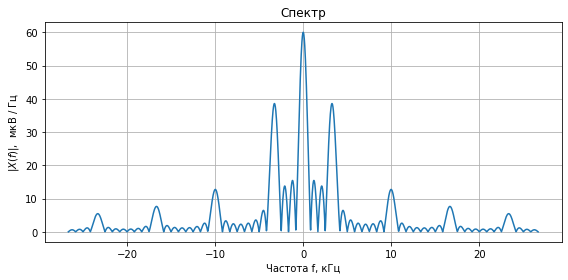

In [2]:
N=4
tau=150e-6 #150 мкс
period = 300e-6 

f_band=np.linspace(-4/tau, 4/tau, 2000) # 2000 - число точек в диапазоне, в которых вычисляется X(f)

def boxcar(t, tau):
    
    for n in range(N):
        tau0 = period * n
        tau1 = tau + period * n
        if tau0 < t < tau1:
            return 0.1 # 0.1 В
    return 0.0 # 0 В
    
t_band=np.linspace(-0.5*tau, N*period, 1024)
plt.figure(figsize=[8, 4])
plt.plot(t_band*1e6, [boxcar(t, tau) for t in t_band])
plt.xlabel("Время t, мкс")
plt.ylabel("$x(t)$, В")
plt.title("Сигнал")
plt.tight_layout() 
plt.grid()

plt.figure(figsize=[8, 4])
plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=0, t2=N*period, res_type="abs")*1e6)
plt.title("Спектр")
plt.xlabel("Частота f, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.tight_layout() 
plt.grid()